# Regressions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('data/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


> __to get Categorical/String based Columns__

In [3]:
dataset.select_dtypes(exclude=['int', 'float']).head()

,Position
0,Business Analyst
1,Junior Consultant
2,Senior Consultant
3,Manager
4,Country Manager


In [4]:
dataset.select_dtypes(include=['object']).head()

,Position
0,Business Analyst
1,Junior Consultant
2,Senior Consultant
3,Manager
4,Country Manager


In [5]:
X = dataset.iloc[:, 1:2]
y = dataset.iloc[:, 2]

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

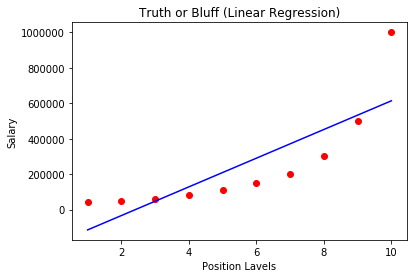

In [7]:
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.xlabel("Position Lavels")
plt.ylabel('Salary')
plt.title("Truth or Bluff (Linear Regression)")
plt.show()

> __Add Polynomial Features__

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X.iloc[:,0:1])
# X_poly = poly_reg.fit_transform(X) --> as we only have one column

In [9]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

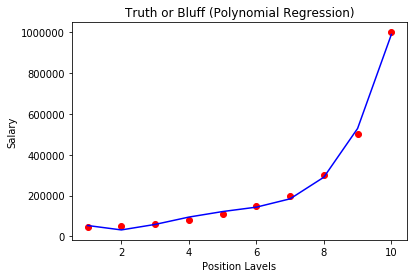

In [10]:
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
plt.xlabel("Position Lavels")
plt.ylabel('Salary')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.show()

> __Support Vector Regression__

In [11]:
from sklearn.svm import SVR
reg_svr = SVR(kernel='rbf')

In [12]:
reg_svr.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

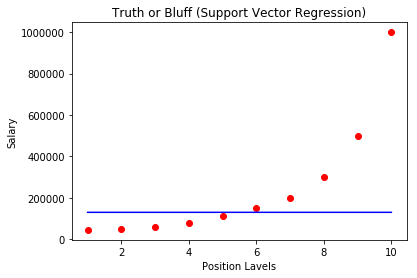

In [13]:
plt.scatter(X, y, color="red")
plt.plot(X, reg_svr.predict(X), color="blue")
plt.xlabel("Position Lavels")
plt.ylabel('Salary')
plt.title("Truth or Bluff (Support Vector Regression)")
plt.show()

*Straight line prediction is because of we didn't do feature scaling. As this SVR is not commonly used. We need to do __feature scaling__ explicitly.* 

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [15]:
X_svr = sc_X.fit_transform(X)
y_svr = sc_y.fit_transform(y.values.reshape(10, 1))

__Standard Scaler does not work with Series, So we have to convert it into matrix or pandas dataframe. Thats why *y.values*__

In [16]:
reg_svr.fit(X_svr, y_svr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

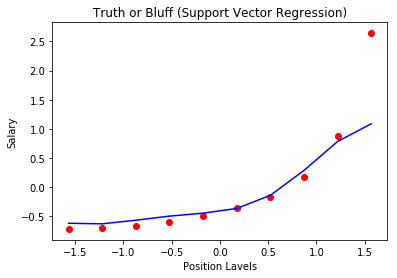

In [17]:
plt.scatter(X_svr, y_svr, color="red")
plt.plot(X_svr, reg_svr.predict(X_svr), color="blue")
plt.xlabel("Position Lavels")
plt.ylabel('Salary')
plt.title("Truth or Bluff (Support Vector Regression)")
plt.show()

__As we have transform X and y. So to predict the correct output to our original dataset, we have to inverse transform it. Also to predict, scale the data, as we have fitted the model on transformed data__ 

In [18]:
y_pred = sc_y.inverse_transform(reg_svr.predict(sc_X.transform([[6.5]])))

In [19]:
y_pred

array([170370.0204065])

> __Random Forest__

In [20]:
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=13)
rf_regressor.fit(X, y)
rf_regressor.predict(6.5)

array([163300.])

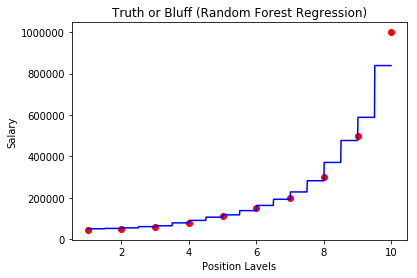

In [22]:
X_grid = np.arange(min(X.Level), max(X.Level), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, rf_regressor.predict(X_grid), color='blue')
plt.xlabel("Position Lavels")
plt.ylabel('Salary')
plt.title("Truth or Bluff (Random Forest Regression)")
plt.show()

> __Logistic Regression__

In [3]:
dataset = pd.read_csv('data/Social_network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [10]:
dataset.shape

(400, 5)

__Split dataset into train and test data__

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [33]:
X_train.shape

(340, 2)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logi_regressor = LogisticRegression()
logi_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_pred = logi_regressor.predict(X_train)

In [38]:
from sklearn.metrics import confusion_matrix

__True/False Prediction Confusion Matrix for Train Data__

In [42]:
cm = confusion_matrix(y_pred, y_train)
cm

array([[192,  41],
       [ 20,  87]])

__True/False Prediction Confusion Matrix for Test Data__

In [43]:
y_pred = logi_regressor.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
cm

array([[44,  3],
       [ 1, 12]])